In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm 

In [29]:
J = -1
B = 2.

In [30]:
# Definiendo el array inicial

def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

In [31]:
N = 10
M = 10
sigma = random_spin_field(N,M)
print(sigma)

[[ 1  1 -1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1  1  1  1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1  1]
 [-1 -1 -1  1  1 -1  1  1 -1 -1]
 [-1  1 -1 -1 -1  1  1 -1  1  1]
 [ 1  1 -1  1  1  1 -1  1  1  1]
 [-1  1  1  1  1  1 -1  1  1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1  1  1]
 [-1  1  1  1  1 -1 -1 -1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1 -1  1]]


In [32]:
def GetEnergy(sigma):
    
    n = sigma.shape[0]
    m = sigma.shape[1]
    
    energy = 0.
     
    for i in range(n):
        for j in range(m):
            
            right = i+1
            if i == n-1:
                right = 0
                
            left = i-1
           
            up = j+1
            if j == m-1:
                up = 0
                
            down = j-1
            
            energy += 0.5*J*sigma[i,j]*\
            (sigma[right,j]+sigma[left,j]+sigma[i,up]+sigma[i,down])
    
    return energy

In [33]:
def GetMagnetization(sigma):
    return np.sum(sigma.ravel())/float(M*N)

In [34]:
print(GetEnergy(sigma), GetMagnetization(sigma))

(-12.0, -0.04)


In [35]:
# Implementamos metropolis

def _ising_step(sigma, T):
    
    beta = 1./T
    
    current = sigma.copy()
    energy1 = GetEnergy(current)
    
    # Calcular una posición en el array
    x = randint(0,sigma.shape[0]-1)
    y = randint(0,sigma.shape[1]-1)
    
    future = current.copy()
    future[x,y] = current[x,y]*(-1)
    
    energy2 = GetEnergy(future)
    
    dE = energy2-energy1
    
    r =  np.random.rand()   
    
    if dE < 0.:
        return future
        
    elif r < np.exp(- dE * beta):
        return future
    
    else:
        return current

In [36]:
Energy = []
Energy2 = []
Magnetization = []

T = 3.0
Ntoys = 20000

sigma_ = sigma.copy()

for i in tqdm(range(Ntoys)):
    sigma_ = _ising_step(sigma_,T)
    
    if i >= 5000:
        energy = GetEnergy(sigma_)
        magnetization = GetMagnetization(sigma_)
        Energy.append(energy)
        Energy2.append(energy**2)
        Magnetization.append(magnetization)

100%|██████████| 20000/20000 [00:08<00:00, 2331.97it/s]


In [37]:
e = np.average(Energy)
e2 = np.average(Energy2)
m = np.average(Magnetization)

cv = (e2 - e**2)/(float(M*N)*T**2)

print(e/float(M*N),m,cv)

(-0.8755226666666667, 0.282592, 0.7187639276246904)


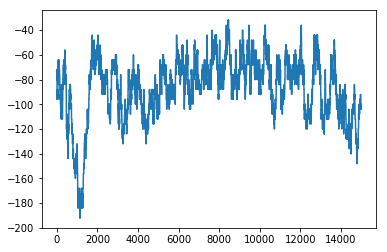

In [38]:
plt.figure()
plt.plot(Energy)

(array([ 143.,  135.,  183.,  353., 1132., 2540., 3474., 4307., 2238.,
         495.]),
 array([-192., -176., -160., -144., -128., -112.,  -96.,  -80.,  -64.,
         -48.,  -32.]),
 <a list of 10 Patch objects>)

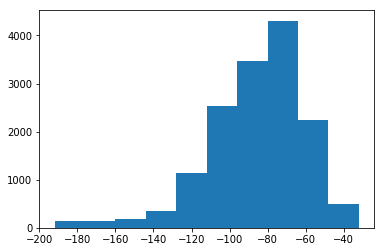

In [39]:
plt.figure()
plt.hist(Energy, bins=10)

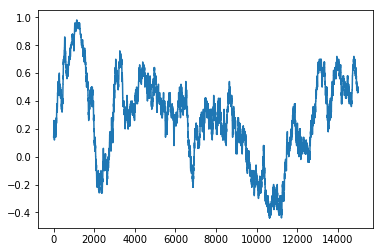

In [40]:
plt.figure()
plt.plot(Magnetization)

(array([ 679.,  976., 1058., 1570., 2299., 3111., 2401., 1860.,  610.,
         436.]),
 array([-0.44 , -0.298, -0.156, -0.014,  0.128,  0.27 ,  0.412,  0.554,
         0.696,  0.838,  0.98 ]),
 <a list of 10 Patch objects>)

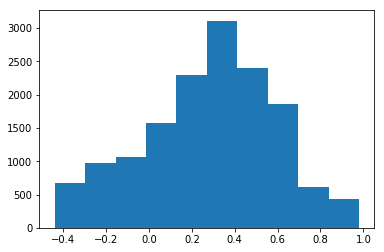

In [41]:
plt.figure()
plt.hist(Magnetization, bins=10)

In [47]:
# Ahora vamos a variar las temperaturas

def GetValues(T, Ntoys = 20000):
    
    sigma_ = sigma.copy()
    
    Energy = []
    Energy2 = []
    Magnetization = []
    
    for i in tqdm(range(Ntoys)):
   
        sigma_ = _ising_step(sigma_,T)

        if i >= 5000:
            energy = GetEnergy(sigma_)
            magnetization = GetMagnetization(sigma_)
            Energy.append(energy)
            Energy2.append(energy**2)
            Magnetization.append(magnetization)
            
    e = np.average(Energy)
    e2 = np.average(Energy2)
    m = np.average(Magnetization)

    cv = (e2 - e**2)/(float(M*N)*T**2)   
    
    return e/float(M*N),np.abs(m),cv    

In [48]:
T = np.arange(1.0,3.0,0.2)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in range(len(T)):
    Energy[t], Mag[t], Cv[t] = GetValues(T[t])
    print(T[t], Energy[t], abs(Mag[t]), Cv[t])

  2%|▏         | 315/20000 [00:00<00:06, 3143.99it/s]

(1.0, -1.9974826666666667, 0.9992839999999998, 0.023664969955570995)


  2%|▏         | 312/20000 [00:00<00:06, 3119.01it/s]

(1.2, -1.9895866666666666, 0.9972533333333333, 0.05770665432100941)


  2%|▏         | 321/20000 [00:00<00:06, 3206.25it/s]

(1.4, -1.9768879999999998, 0.9939453333333333, 0.09884738721091116)


  1%|▏         | 296/20000 [00:00<00:06, 2959.29it/s]

(1.5999999999999999, -1.9323706666666667, 0.9811, 0.2458679663889143)


  2%|▏         | 314/20000 [00:00<00:06, 3136.77it/s]

(1.7999999999999998, -1.8755600000000001, 0.9600293333333335, 0.3954376460905123)


  2%|▏         | 320/20000 [00:00<00:06, 3196.23it/s]

(1.9999999999999998, -1.7462186666666668, 0.9182026666666667, 0.5259452046222124)


  2%|▏         | 308/20000 [00:00<00:06, 3079.20it/s]

(2.1999999999999997, -1.4822026666666668, 0.7584413333333333, 0.9470292340128489)


  1%|▏         | 276/20000 [00:00<00:07, 2755.23it/s]

(2.3999999999999995, -1.1633946666666666, 0.256656, 1.2376128976543197)


  1%|▏         | 260/20000 [00:00<00:07, 2599.66it/s]

(2.5999999999999996, -1.167616, 0.5212493333333333, 1.1568319015384603)


100%|██████████| 20000/20000 [00:11<00:00, 1776.07it/s]

(2.8, -0.888696, 0.15170533333333333, 0.4470613042176863)


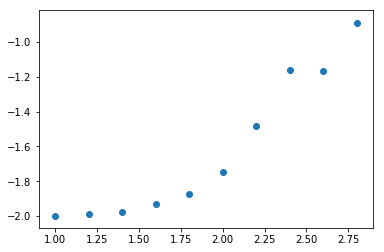

In [49]:
plt.figure()
plt.scatter(T,Energy)

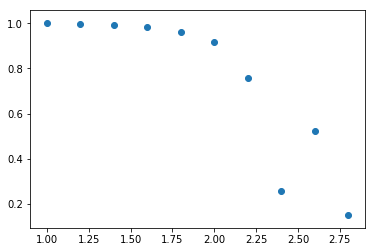

In [50]:
plt.figure()
plt.scatter(T,Mag)

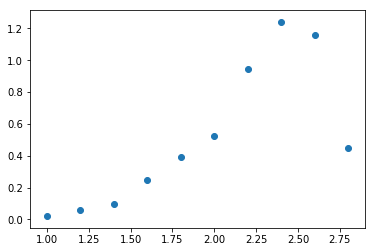

In [51]:
plt.figure()
plt.scatter(T,Cv)